## A step-by-step guide to Data Visualizations in Python

Follow along with [this article](https://medium.com/codex/step-by-step-guide-to-data-visualizations-in-python-b322129a1540).  We will be using [this .xlsx dataset](https://www.kaggle.com/roshansharma/immigration-to-canada-ibm-dataset) from Kaggle on Immigration to Canada from 1980–2013. No need to dowload it, it is already in the git repositroy you forked.<br>

#### We suggest that instead of copy and pasting the code, you type it out.  This will help you become more familiar with the syntex and better understand it.


### Step-1: Importing Packages

In [1]:
#import all librarys and modules needed

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
plt.rcParams['figure.figsize'] = (20,10)

### Step-2 : Importing and Cleaning Data 

In [35]:
#import and clean data, remember path is data/Canada.xlsx

df = pd.read_excel('data/Canada.xlsx',1, skiprows = range(20), skipfooter =2)
df.drop (['AREA','REG', 'DEV','Type','Coverage', 'DevName'], axis = 1, inplace = True)
df.rename(columns = {'OdName':'country','AreaName':'continent','RegName':'region'}, inplace = True)
df['total'] = df.sum(axis = 1)
df = df.set_index('country')
df.rename(index = {'United Kingdom of Great Britain and Northern Ireland':'UK & Ireland'}, inplace =True)
df.columns = df.columns.astype(str)
years = list(map(str,range(1980,2013)))

C:\Users\lama_\AppData\Local\Temp\ipykernel_12960\2952929842.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['total'] = df.sum(axis = 1)


### Step-3 : Creating Beautiful Visualizations

#### Line Chart

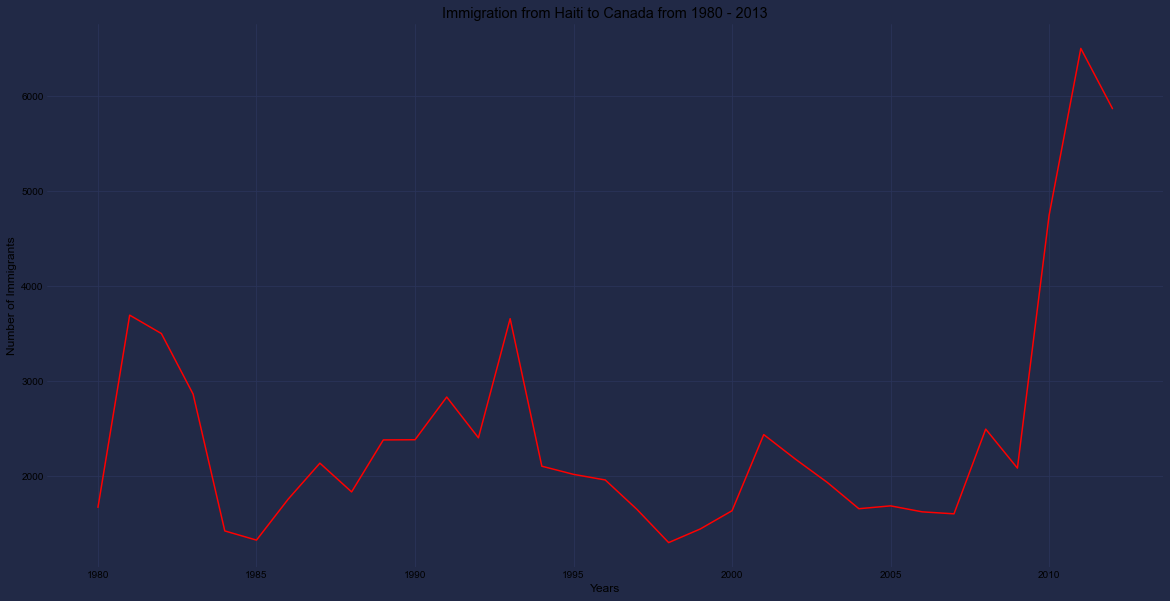

In [50]:
# Single line chart

fig1 =df.loc['Haiti',years].plot(kind='line',color='r')
plt.title('Immigration from Haiti to Canada from 1980 - 2013', color = 'black')
plt.xlabel('Years',color ='black')
plt.ylabel('Number of Immigrants', color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('linechart_single.png')
plt.show()


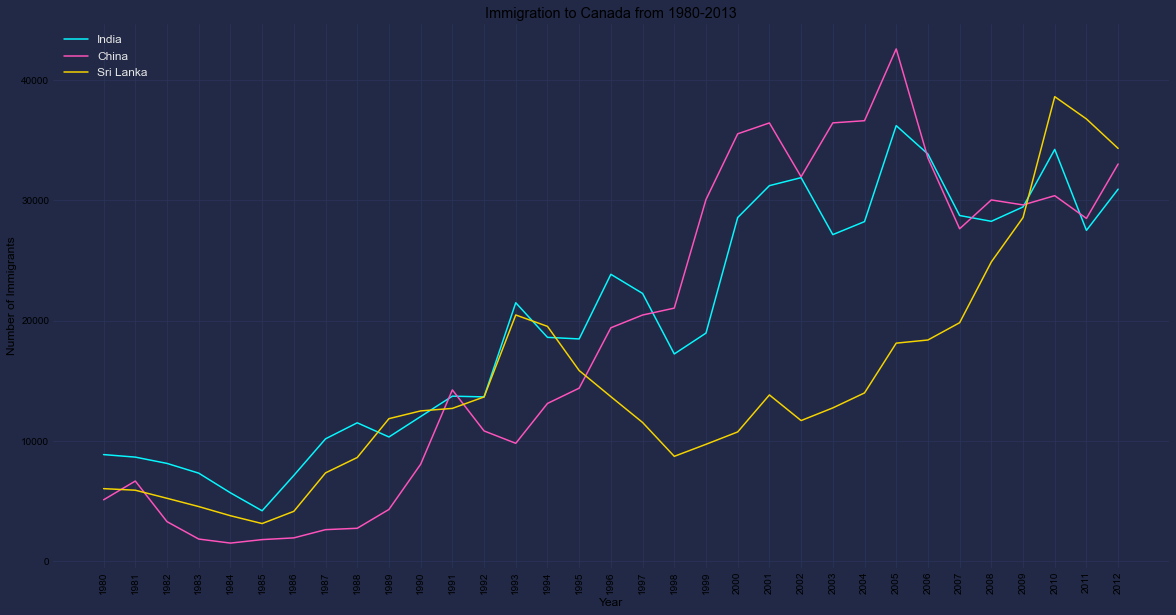

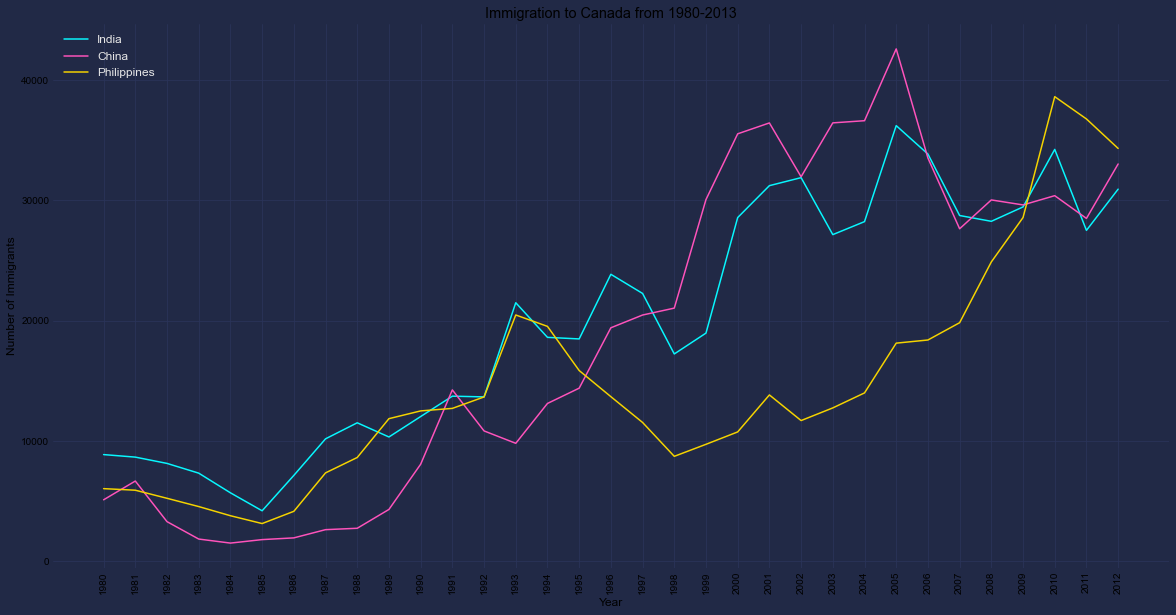

In [41]:
# Multiple Line chart 

fig2 = plt.plot(df.loc['India',years], label = 'India')
plt.plot(df.loc['China',years], label = 'China')
plt.plot(df.loc['Philippines',years], label = 'Philippines')
plt.legend(loc = 'upper left', fontsize = 12)
plt.xticks( rotation = 90, color = 'black')
plt.yticks(color ='black')
plt.title('Immigration to Canada from 1980-2013',color = 'black')
plt.xlabel('Year',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.savefig('linechart_multiple.png')
plt.show()

#### Lets talk about style   

In [5]:
#Shows all avaiable built-in styles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


To see a visualization of the aviable style sheets [click here](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html). 

Syntex to select a specific style is: plt.style.use('style_name') 

Try it out by adding the line of code to the top of the code block above and choose one of the preinstalled styles. Which style is your favorite?<br><br>

What happens when you change the line- plt.legend(loc = 'upper left', fontsize = 12) to plt.legend(loc = 'lower right', fontsize = 12)? <br><br><br><br>



Experiment changing other lines of the code and see how the graph changes. Add any notes or observations here. Going forward feel free to experiment with each graph type<br><br><br><br><br><br>

#### Install mplcyberpunk
Open a terminal window and at at the prompt type:

python -V

If its python 3.something, copy and paste: pip install mplcyberpunk
If its python 2.something, copy and paste: pip3 install mplcyberpunk


For more info on mplcyberpunk click [here.](https://github.com/dhaitz/mplcyberpunk)

In [6]:
pip install mplcyberpunk


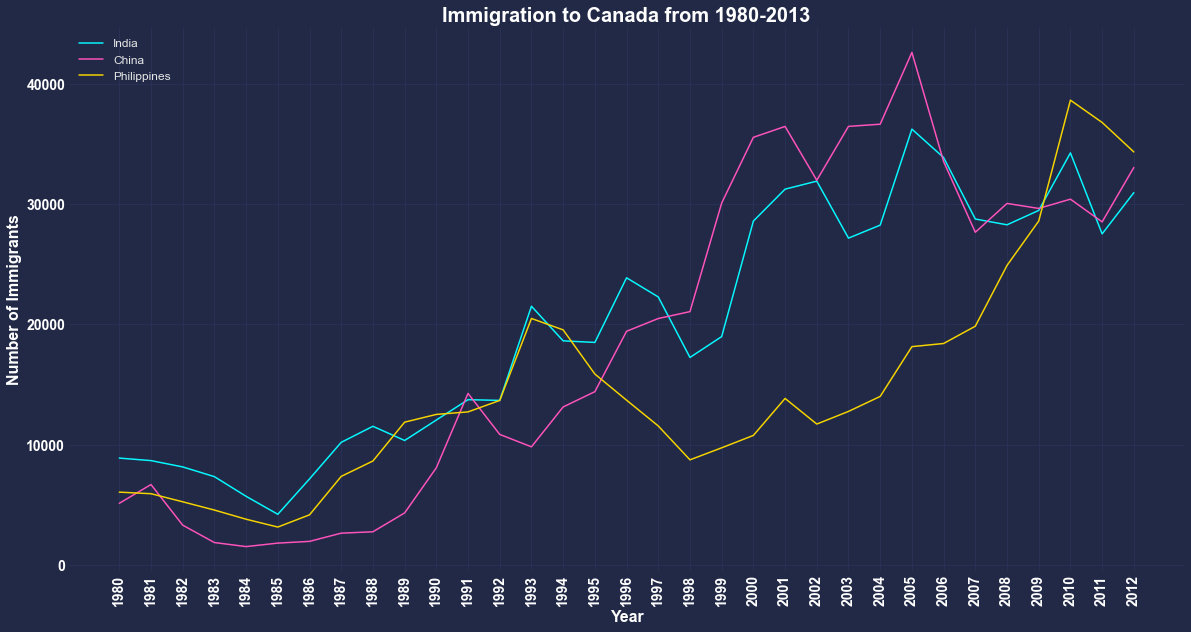

In [49]:
# Cyberpunk Multiple Line Chart

import mplcyberpunk
style.use('cyberpunk')
plt.plot(df.loc['India',years], label = 'India')
plt.plot(df.loc['China',years], label = 'China')
plt.plot(df.loc['Philippines', years] , label = 'Philippines')
plt.legend(loc = 'upper left', fontsize = 12)
plt.xticks(rotation = 90, color = 'white',fontsize = 14, fontweight = 'bold')
plt.yticks(color = 'white', fontsize = 14, fontweight ='bold')
plt.title('Immigration to Canada from 1980-2013',color = 'white', fontsize = 20, fontweight = 'bold')
plt.xlabel('Year',color = 'white',fontsize = 16, fontweight ='bold')
plt.ylabel('Number of Immigrants', color = 'white',fontsize = 16, fontweight ='bold')
plt.savefig('cyber_line.png')
plt.show()




#### Bar Chart

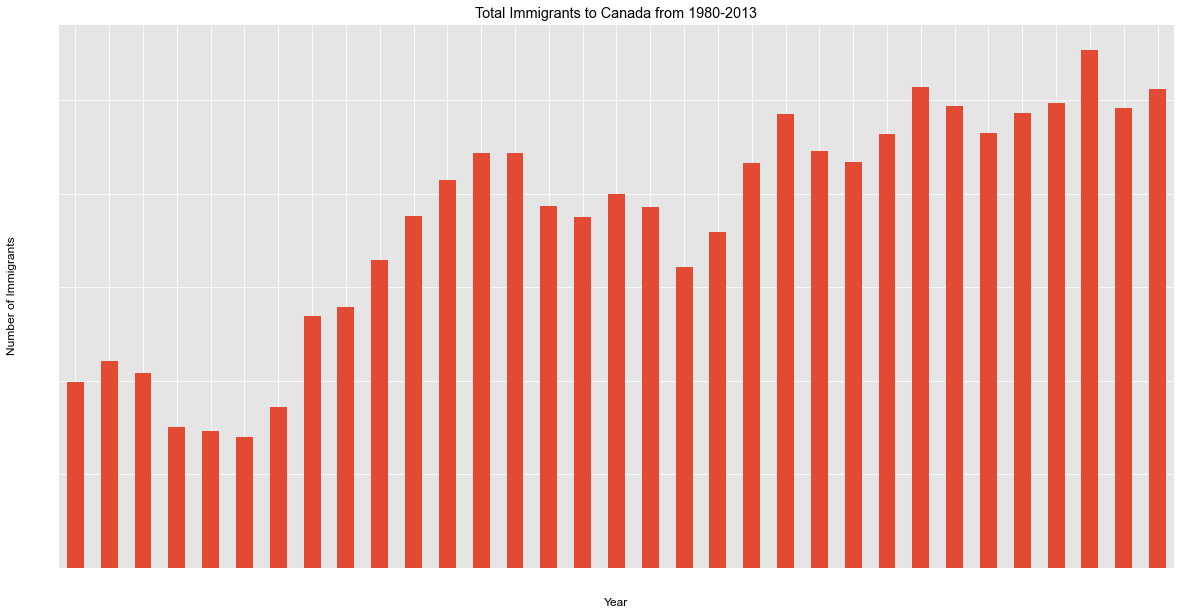

In [57]:
# Vertical bar chart
# Do not change the style back to ggplot 
# delete the style.use('ggplot') line of code
style.use('ggplot')


df_tot = pd.DataFrame(df.loc[:,years].sum())
df_tot.rename(columns = {0:'total'}, inplace = True)

df_tot.plot(kind = 'bar', legend = False)
plt.title('Total Immigrants to Canada from 1980-2013',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Year',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.savefig('bar_vertical.png')

plt.show()


Notice that style is still set to cyberpunk.  How do we fix it so we can see the labels?<br> <br>

Answer: change the color = 'black' to 'white'

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

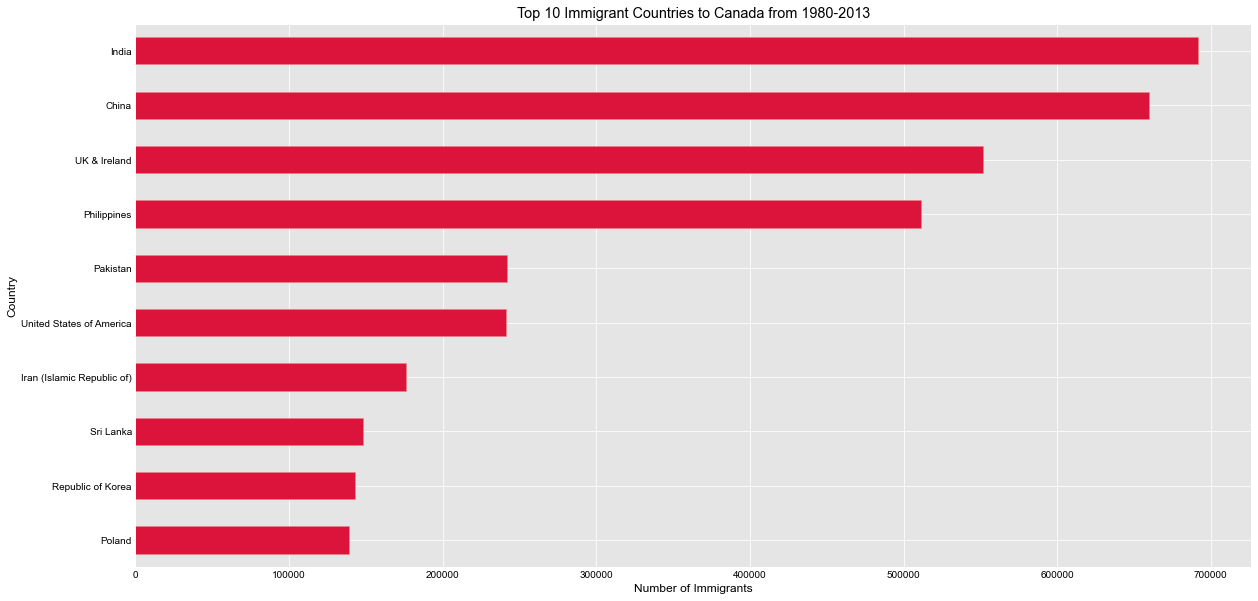

In [63]:
# Horizontal bar chart
#change style back to ggplt

df_top10 = pd.DataFrame(df.nlargest(10,'total')['total'].sort_values(ascending = True))

df_top10.plot.barh(legend = False, color = 'crimson', edgecolor = 'lightcoral')
plt.title('Top 10 Immigrant Countries to Canada from 1980-2013',color = 'black')
plt.xlabel('Number of Immigrants',color = 'black')
plt.ylabel('Country',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')

plt.savefig('bar_horizontal.png')

plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

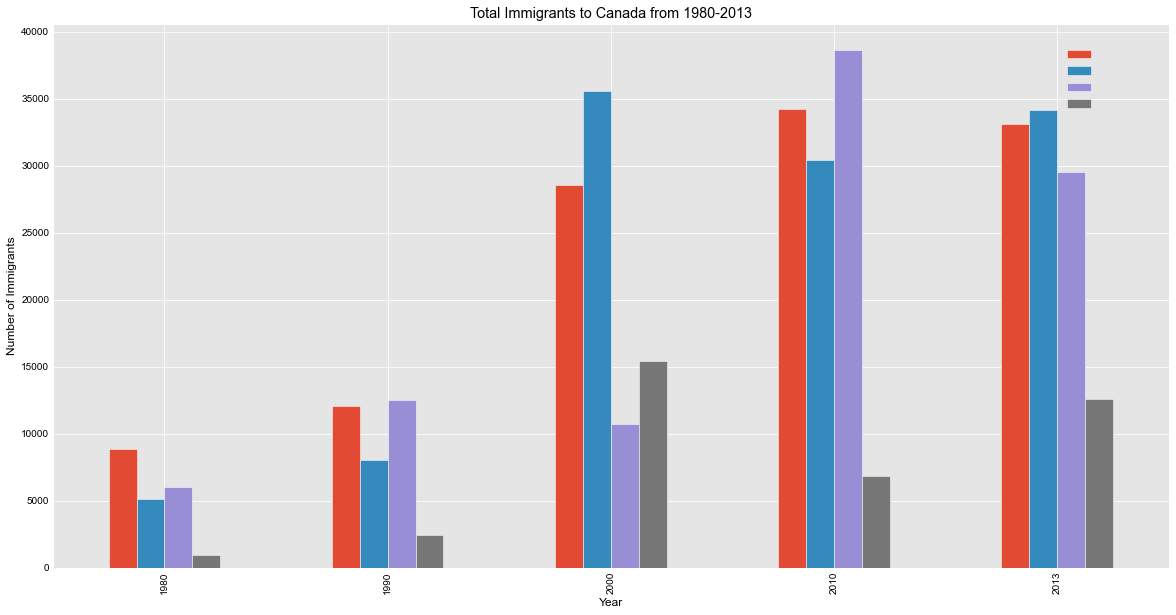

In [10]:
# Grouped bar chart
year_int10 = list(map(str, (1980,1990,2000,2010, 2013)))
df_group = pd.DataFrame(df.loc[['India','China','Philippines','Pakistan'],year_int10].T)

df_group.plot.bar(edgecolor = 'white')
plt.title('Total Immigrants to Canada from 1980-2013',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Year',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.legend(title = 'Country', fontsize = 12)
plt.savefig('bar_grouped.png')

plt.show()


Notice how the labels in the legend have disapeared?  We can fix this by adding labelcolor='k' to plt.legend<br>
<br>plt.legend(title = 'Country', fontsize = 12, labelcolor='black')



Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Area Chart

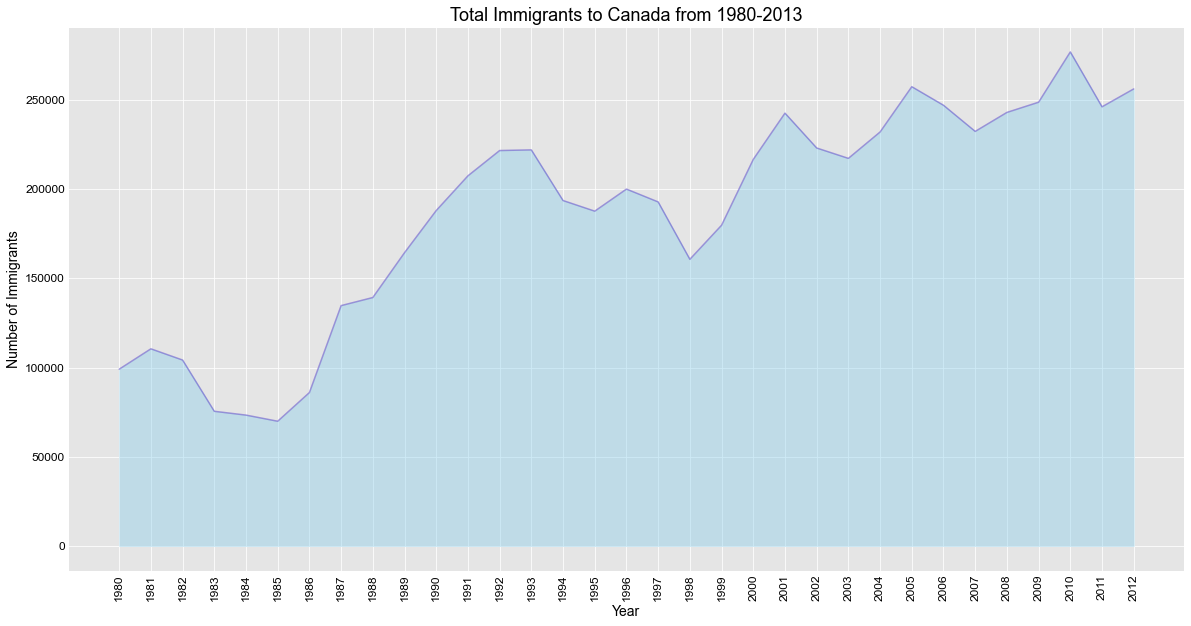

In [11]:
# Area Chart
plt.fill_between(df_tot.index, df_tot['total'], color="skyblue", alpha=0.4)
plt.plot(df_tot.index, df_tot['total'], color = 'Slateblue', alpha = 0.6)
plt.title('Total Immigrants to Canada from 1980-2013', fontsize = 18, color = 'black')
plt.yticks(fontsize = 12, color = 'black')
plt.xticks(fontsize = 12, rotation = 90, color = 'black')
plt.xlabel('Year', fontsize = 14, color = 'black')
plt.ylabel('Number of Immigrants', fontsize = 14, color = 'black')
plt.savefig('area_simple.png')

plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

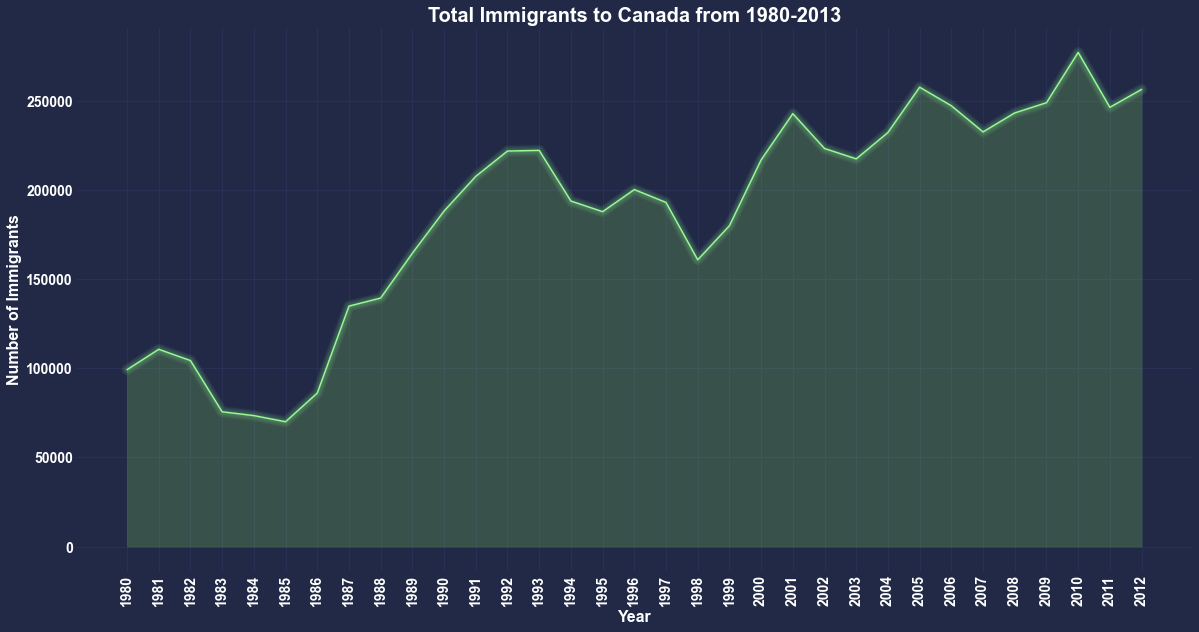

In [12]:
# cyberpunk simple area chart
import mplcyberpunk

style.use('cyberpunk')

plt.fill_between(df_tot.index, df_tot['total'], color = 'greenyellow', alpha = 0.1)
plt.plot(df_tot.index, df_tot['total'], color = 'palegreen', alpha = 1)
mplcyberpunk.add_glow_effects()
plt.title('Total Immigrants to Canada from 1980-2013', fontsize = 20,fontweight = 'bold', color = 'white')
plt.yticks(fontsize = 14, color = 'white',fontweight = 'bold')
plt.xticks(fontsize = 14, rotation = 90, color = 'white',fontweight = 'bold')
plt.xlabel('Year', fontsize = 16, color = 'white',fontweight = 'bold')
plt.ylabel('Number of Immigrants', fontsize = 16, color = 'white',fontweight = 'bold')
plt.savefig('cyber_area_simple.png')

plt.show()


Feel free to experiment and add any notes or observations here. <br><br><br><br><br>w

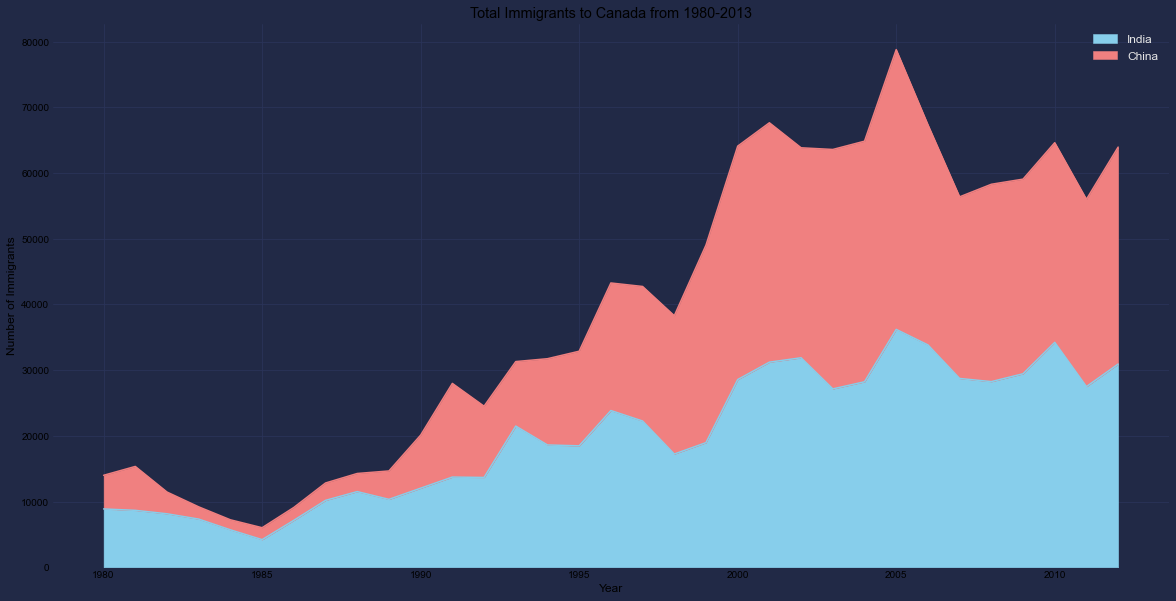

In [13]:
# stacked area chart
color = ['skyblue','lightcoral']
top2_list = df.nlargest(2, 'total').index.tolist()
df_top2 = pd.DataFrame(df.loc[top2_list, years].T)

df_top2.plot(kind = 'area', stacked = True, color = color)
plt.title('Total Immigrants to Canada from 1980-2013',color = 'black')
plt.legend(fontsize = 12)
plt.xlabel('Year',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('area_stacked.png')

plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

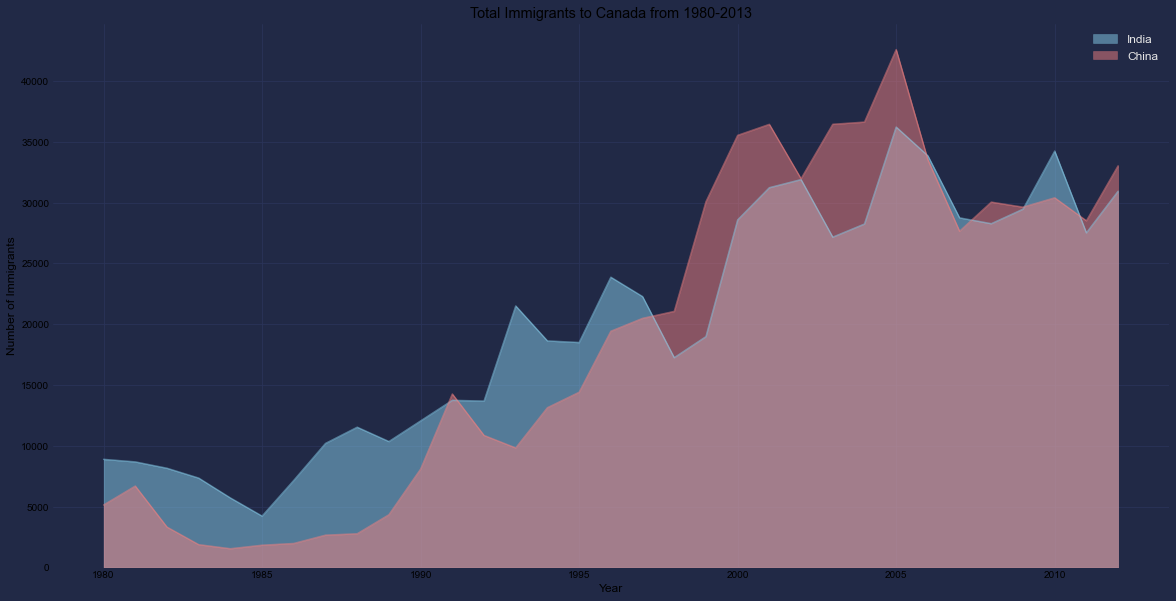

In [14]:
# unstacked area chart
df_top2.plot(kind = 'area', stacked = False, color = color)
plt.title('Total Immigrants to Canada from 1980-2013',color = 'black')
plt.xlabel('Year',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.legend(fontsize = 12)
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('area_unstacked.png')

plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Box Plot

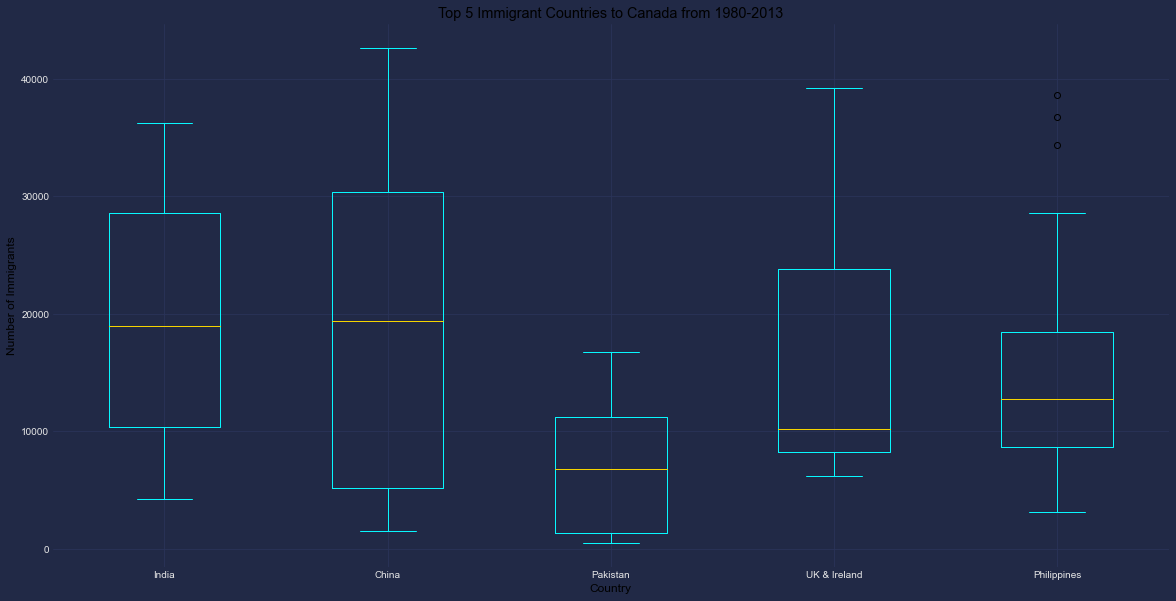

In [15]:
# Vertical Box Plot
df_box = pd.DataFrame(df.loc[['India','China','Pakistan','UK & Ireland','Philippines'], years].T)

df_box.plot(kind = 'box')
plt.title('Top 5 Immigrant Countries to Canada from 1980-2013', color = 'black')
plt.xlabel('Country', color = 'black')
plt.ylabel('Number of Immigrants', color = 'black')
plt.savefig('box_vertical.png')

plt.show()


Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

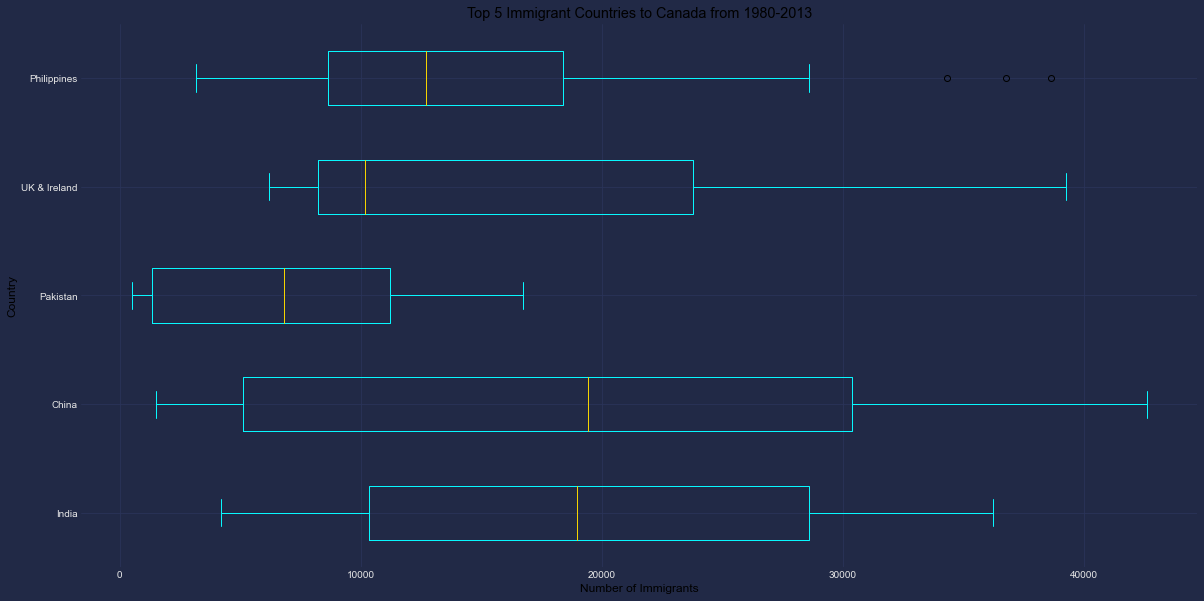

In [16]:
# horizontal box plot
df_box.plot(kind = 'box', vert = False)
plt.title('Top 5 Immigrant Countries to Canada from 1980-2013', color = 'black')
plt.ylabel('Country', color = 'black')
plt.xlabel('Number of Immigrants', color = 'black')
plt.savefig('box_horizontal.png')

plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Scatter Plot

With the newist version of Seaborn we have to specify x and y.

example: sb.scatterplot(x = 'sepal_length', y = 'sepal_width', data = df_iris)

C:\Users\lama_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


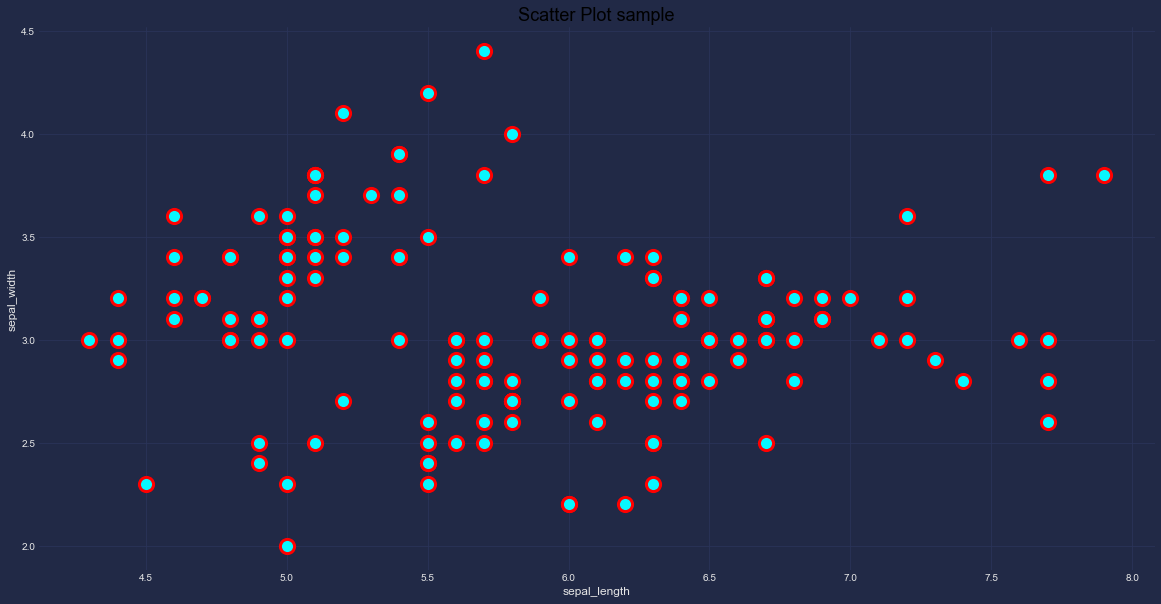

In [17]:
#scatter plot comparing sepal length to sepal width
import seaborn as sb
df_iris = sb.load_dataset('iris')

sb.scatterplot('sepal_length','sepal_width', data = df_iris, s = 200, linewidth = 3, edgecolor = 'Red')
plt.title('Scatter Plot sample', color = 'black', fontsize = 18)
plt.savefig('scatter.png')

plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Histogram

With the newist version of Seaborn they have deprecated distplot. Replace distplot with histplot and add kde = True

example:
sb.histplot(df_iris['sepal_length'], color = 'Red', label = 'Sepal Length', kde = True)

C:\Users\lama_\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lama_\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


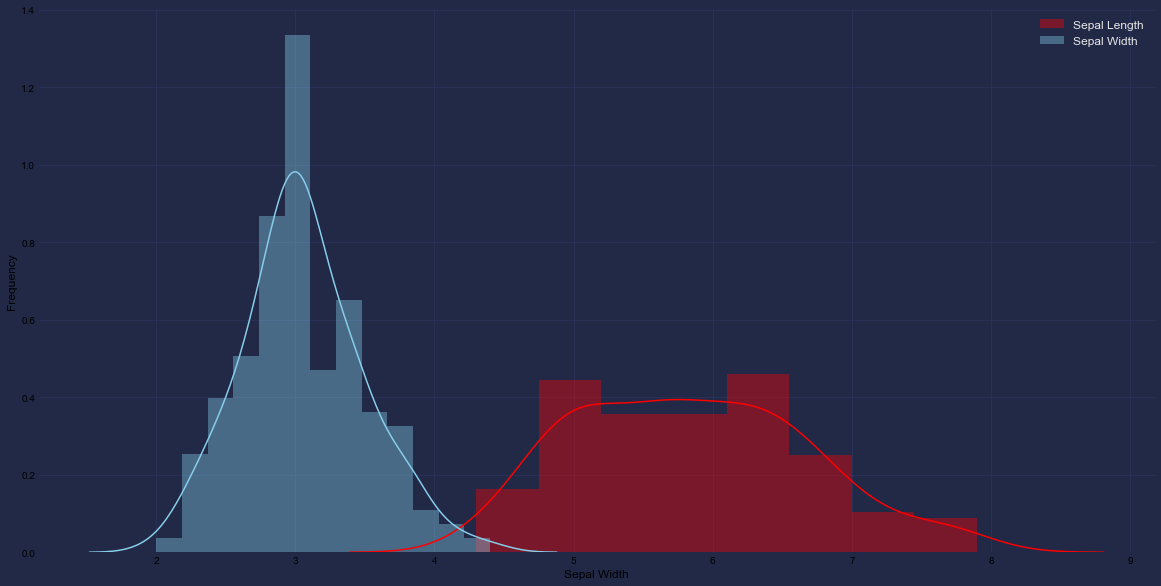

In [18]:
#Histogram side by side, with kde
df_iris = sb.load_dataset('iris')

sb.distplot(df_iris['sepal_length'], color = 'Red', label = 'Sepal Length')
sb.distplot(df_iris['sepal_width'], color = 'skyblue', label = 'Sepal Width')
plt.legend(fontsize = 12)
plt.xlabel('Sepal Width', color = 'black')
plt.ylabel('Frequency', color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('histogram.png')

plt.show()


Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Bubble Plot

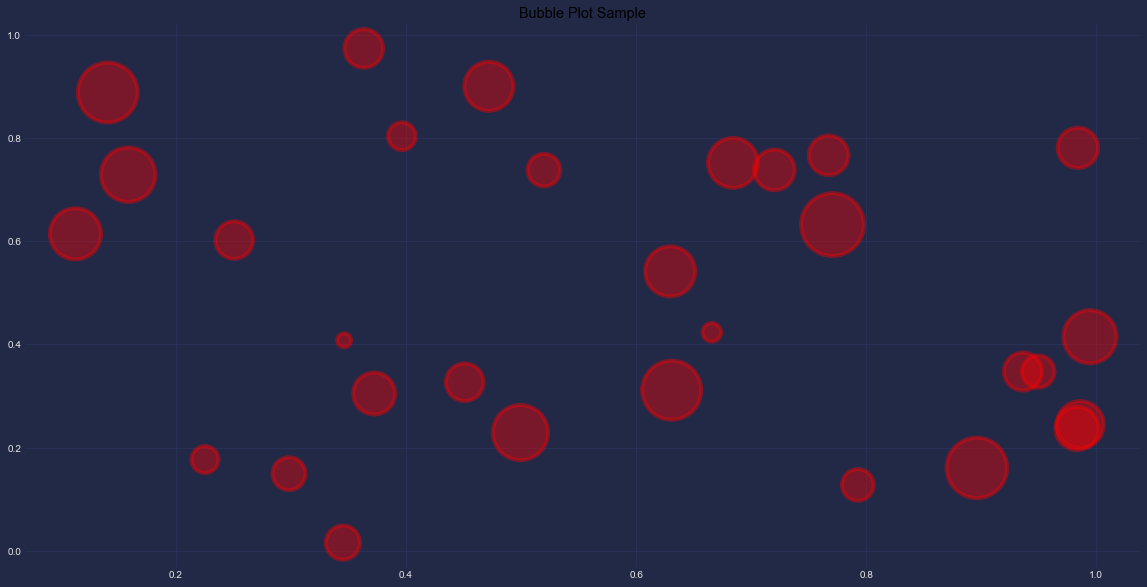

In [19]:
# Bubble Plot
x = np.random.rand(1,30,1)
y = np.random.rand(1,30,1)
size = np.random.rand(1,30,1)

plt.scatter(x,y,s = size*4000, alpha = 0.4, color = 'r', edgecolor = 'Red', linewidth = 4)
plt.title('Bubble Plot Sample', color = 'black')
plt.savefig('bubble.png')

plt.show()


Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Pie Chart

Skip this one as the code throws an error. 

df_pie = pd.DataFrame(df.groupby('continent')['total'].sum().T)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode = [0,0.1,0,0,0.1,0.1]

plt.pie(df_pie, colors = colors, autopct = '%1.1f%%', startangle = 90, explode = explode, pctdistance = 1.12, shadow = True)
plt.title('Continent-Wise Immigrants Distribution', color = 'black', y = 1.1, fontsize = 18)
plt.legend(df_pie.index, loc = 'upper left', fontsize = 12)
plt.axis('equal')
plt.savefig('pie.png')

plt.show()

#### Doughnut Chart

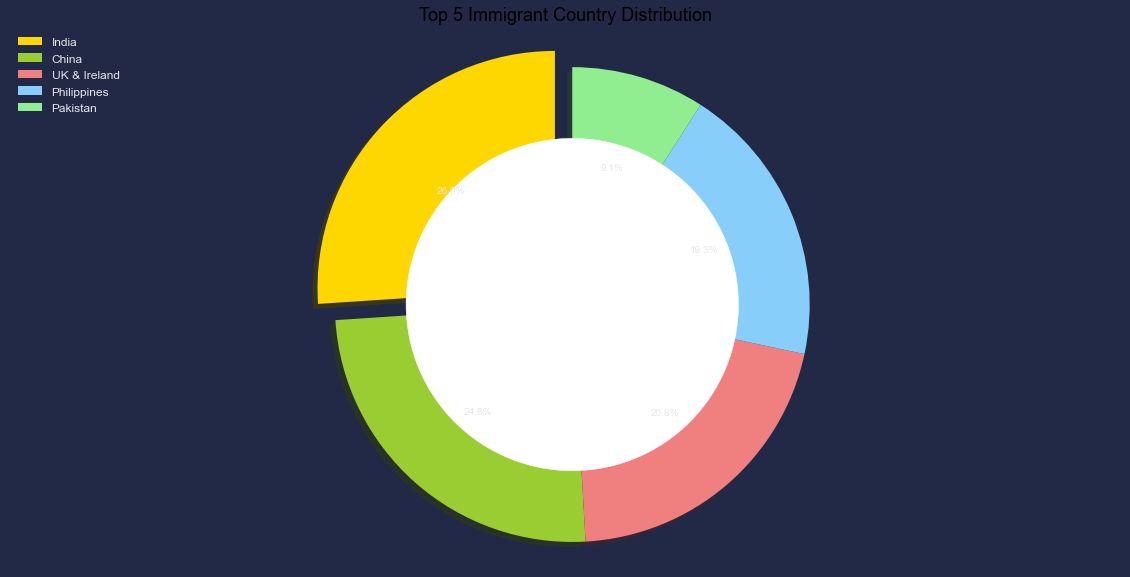

In [20]:
# Doughnut Chart
top5_list = df.nlargest(5, 'total').index.tolist()
df_top5 = pd.DataFrame(df.loc[top5_list, 'total'].T)
circle = plt.Circle( (0,0), 0.7, color='white')
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']

plt.pie(df_top5['total'], autopct = '%1.1f%%', shadow = True, explode = [0.1,0,0,0,0], colors = colors, startangle = 90)
fig = plt.gcf()
fig.gca().add_artist(circle)
plt.legend(df_top5.index, fontsize = 12, loc = 'upper left')
plt.title('Top 5 Immigrant Country Distribution', color = 'black', fontsize = 18)
plt.axis('equal')
plt.savefig('doughnut.png')

plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Regression Plot

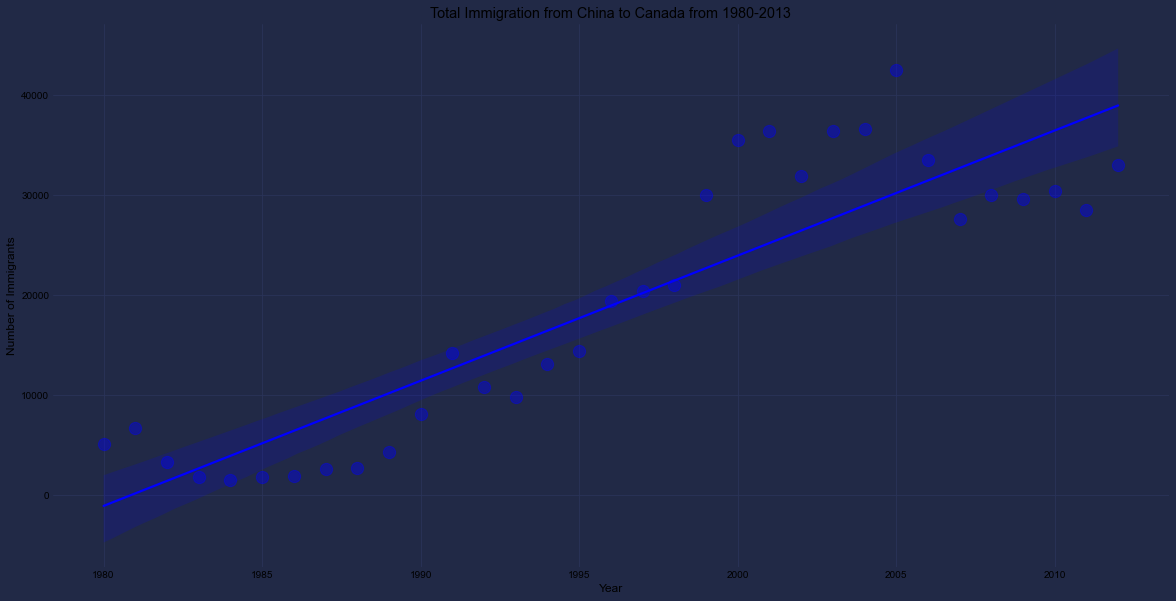

In [21]:
# Strong trend
df_reg = pd.DataFrame(df.loc['China',years])
df_reg.reset_index(inplace = True)
df_reg.rename(columns = {'index':'year'}, inplace = True)
df_reg[['year','China']] = df_reg[['year','China']].astype(int)

sb.regplot(x = 'year', y = 'China', data = df_reg, color = 'b', scatter_kws = {'s':150,'alpha':0.4})
plt.title('Total Immigration from China to Canada from 1980-2013', color = 'black')
plt.xlabel('Year', color = 'black')
plt.ylabel('Number of Immigrants', color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('reg_strong.png')

plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

Text(0.5, 0, 'Year')

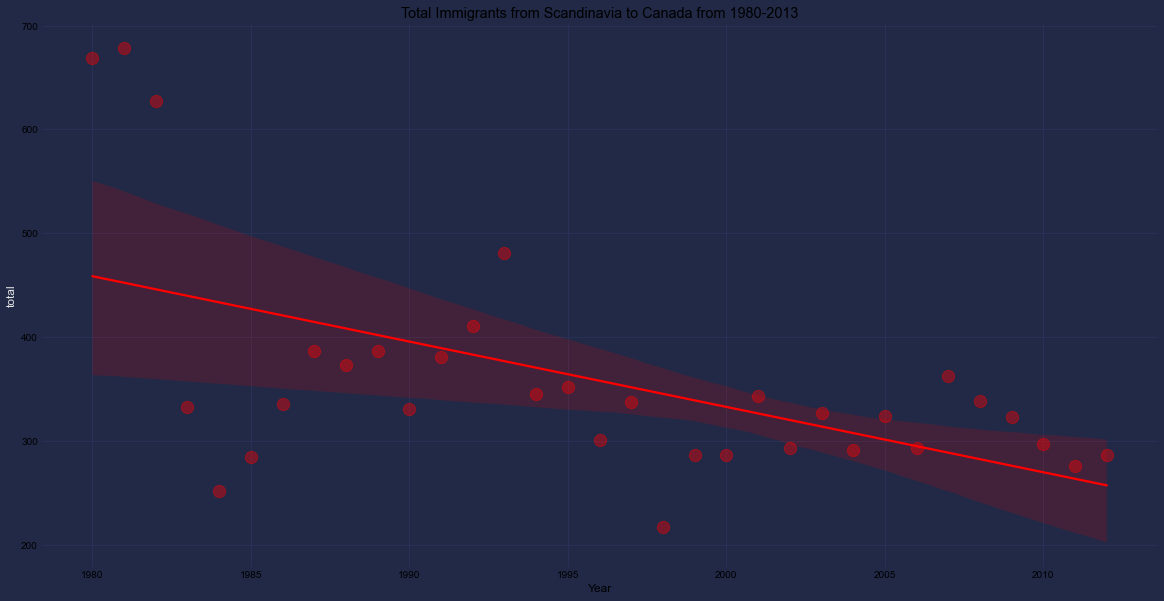

In [22]:
# Weak trend
df_reg1 = pd.DataFrame(df.loc[['Denmark','Norway','Sweden'],years].sum())
df_reg1.reset_index(inplace = True)
df_reg1.rename(columns = {'index':'year',0:'total'}, inplace = True)
df_reg1[['year','total']] = df_reg1[['year','total']].astype(int)

sb.regplot(x = 'year', y = 'total', data = df_reg1, color = 'Red', scatter_kws = {'s':150,'alpha':0.4})
plt.title('Total Immigrants from Scandinavia to Canada from 1980-2013', color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Year', color = 'black')

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Word Cloud

You might need to pip install wordcloud and pip install Pywaffle.  Follow the instruction from when you installed cyperpunk earlier.

Make sure to add the txt files from [here](https://github.com/codinglikeagirl42/DataVisualizationPython) to your data folder and remember the path is data/filename.txt. Try creating your own txt file to visualize.

In [23]:
pip install wordcloud 


Note: you may need to restart the kernel to use updated packages.


In [24]:

pip install Pywaffle    

Note: you may need to restart the kernel to use updated packages.


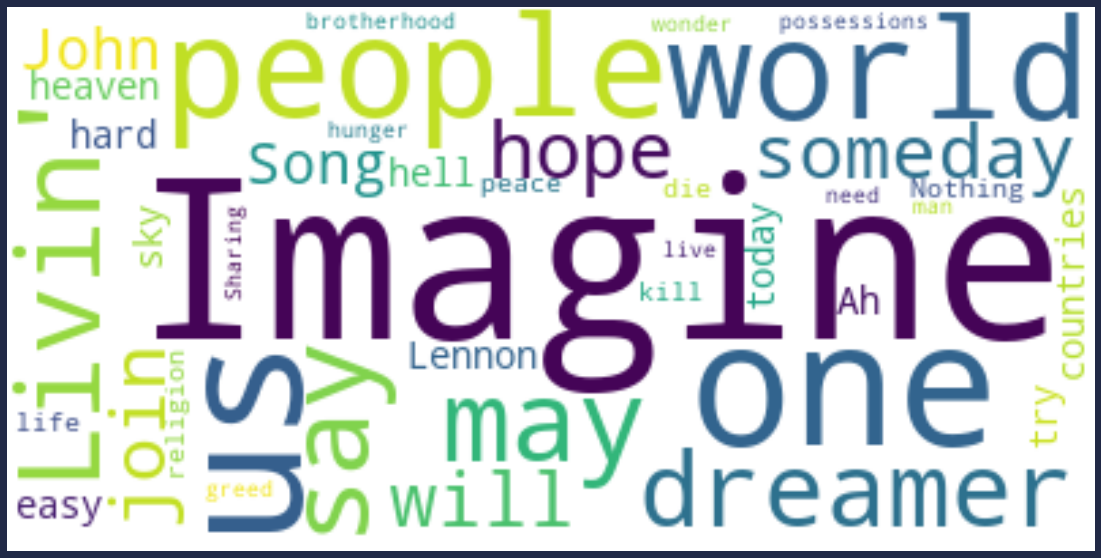

In [30]:
# word cloud
from wordcloud import WordCloud, STOPWORDS

text = open('data/imagine.txt', 'r', encoding = 'utf-8').read()

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white', max_words = 200, stopwords = stopwords)

wordcloud.generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.savefig('wordcloud.png')

plt.show()

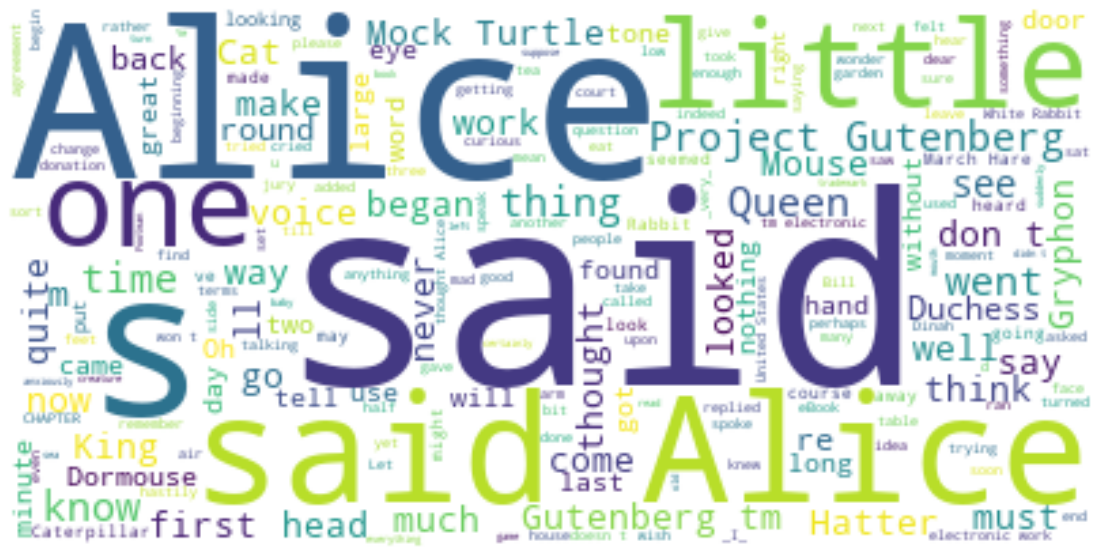

In [64]:
from wordcloud import WordCloud, STOPWORDS

text = open('data/Alice.txt', 'r', encoding = 'utf-8').read()

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white', max_words = 200, stopwords = stopwords)

wordcloud.generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.savefig('wordcloud.png')

plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Lollipop Chart

In [ ]:
# Lollipop chart
plt.stem(df_tot.index, df_tot['total'])
plt.title('Total Immigrants to Canada from 1980-2013', color = 'black')
plt.xlabel('Year', color = 'black')
plt.ylabel('Number of Immigrants', color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('lollipop.png')

plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>